
--- Image 1: 2011_004705.jpg ---
Shape: (500, 375, 3)
Min pixel: 0
Max pixel: 255
Mean pixel: 89.30668088888889
Std deviation: 52.25925687430518


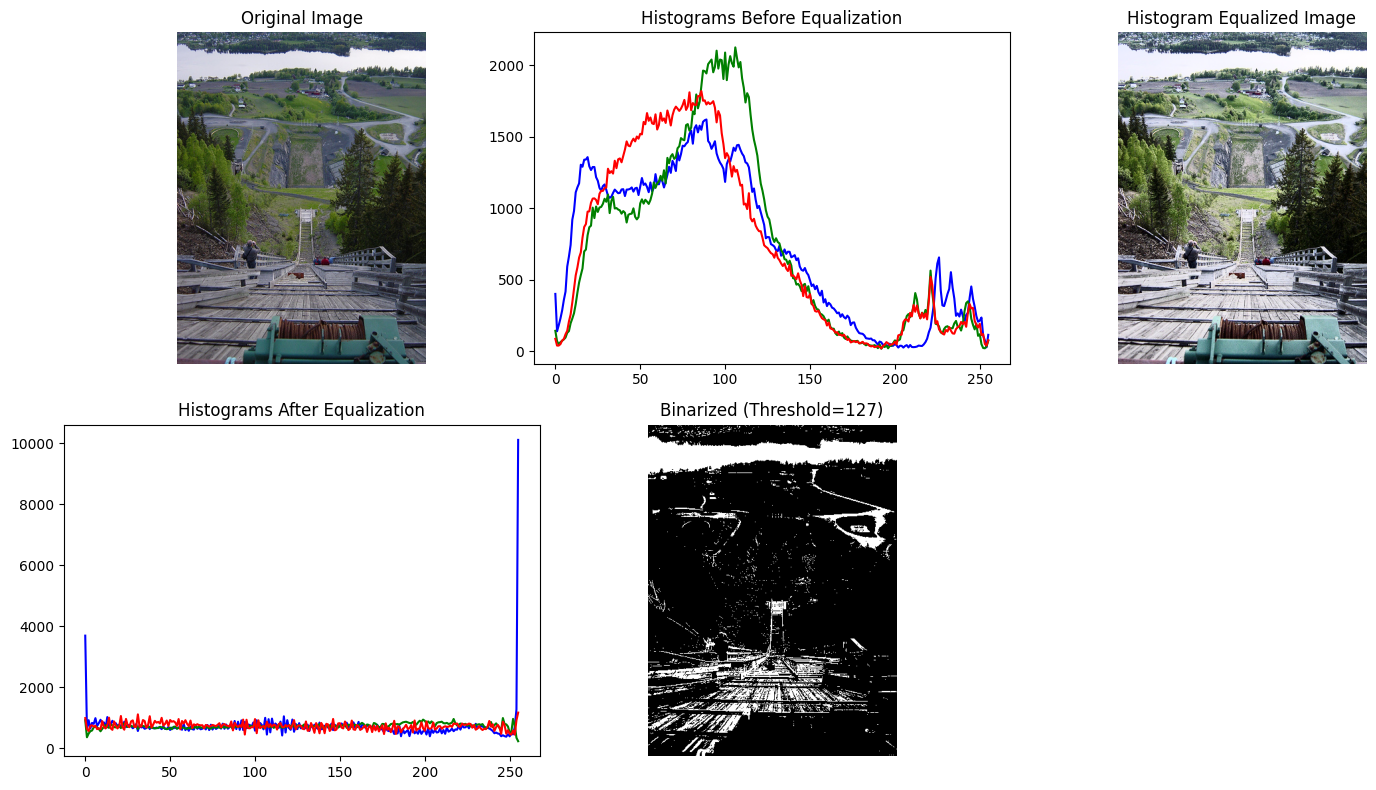


--- Image 2: 2011_003709.jpg ---
Shape: (500, 334, 3)
Min pixel: 0
Max pixel: 255
Mean pixel: 164.42520958083833
Std deviation: 65.354420650854


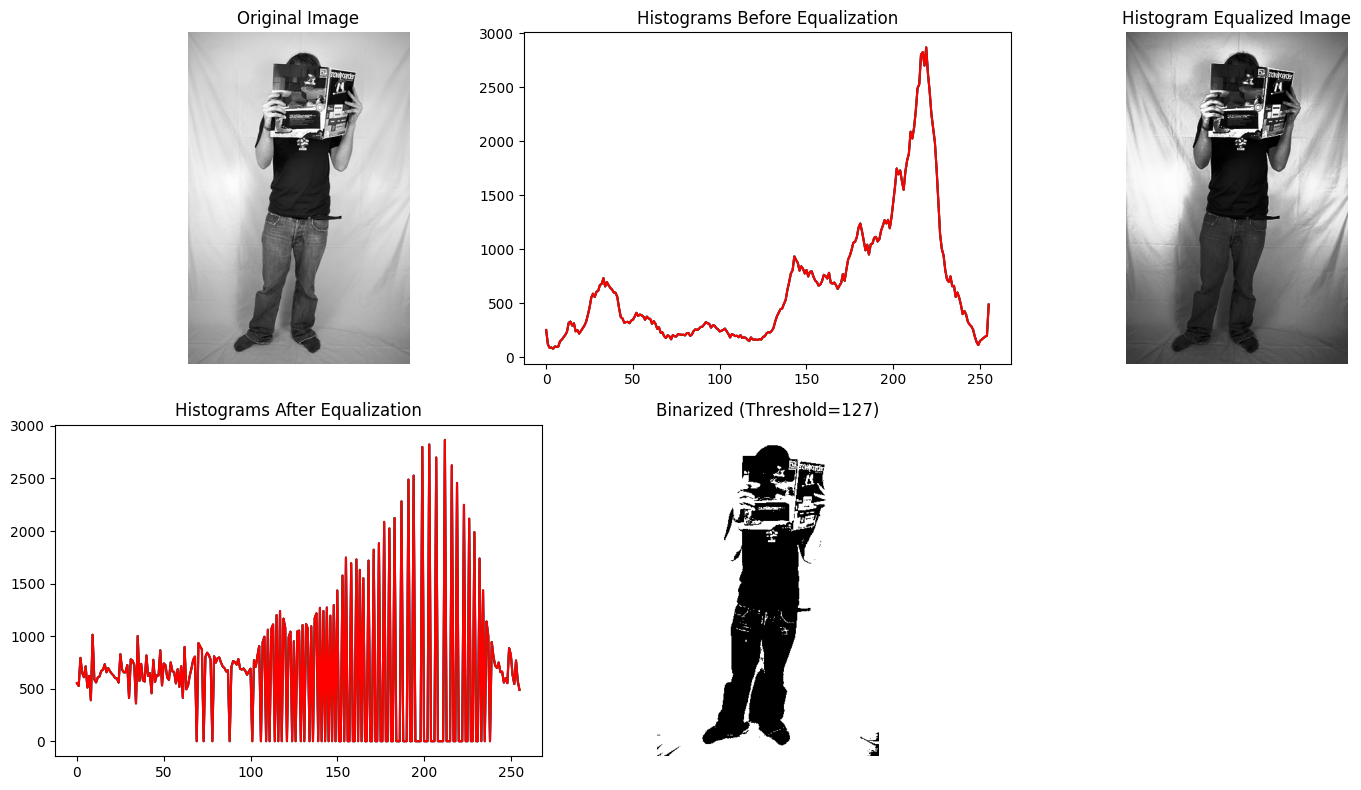


--- Image 3: 2008_002787.jpg ---
Shape: (375, 500, 3)
Min pixel: 0
Max pixel: 255
Mean pixel: 99.98166577777778
Std deviation: 56.404652541264184


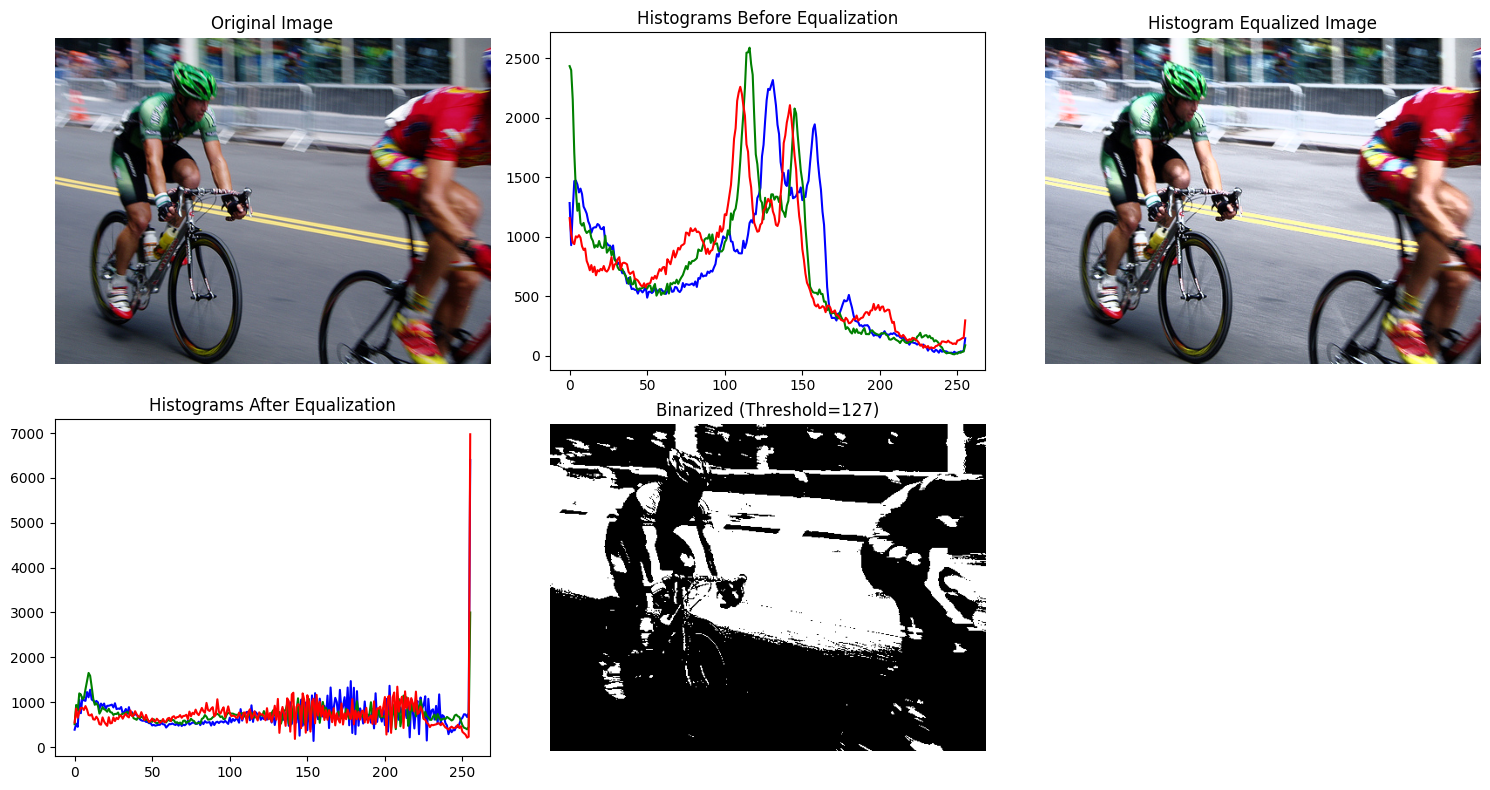

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


data_dir = "JPEGImages"


all_images = os.listdir(data_dir)
sample_images = random.sample(all_images, 3)

for idx, img_name in enumerate(sample_images, 1):
    img_path = os.path.join(data_dir, img_name)
    img = cv2.imread(img_path)

    print(f"\n--- Image {idx}: {img_name} ---")
    print("Shape:", img.shape)
    print("Min pixel:", np.min(img))
    print("Max pixel:", np.max(img))
    print("Mean pixel:", np.mean(img))
    print("Std deviation:", np.std(img))

    hist_orig = {}
    colors = ('b', 'g', 'r')
    for i, col in enumerate(colors):
        hist_orig[col] = cv2.calcHist([img], [i], None, [256], [0, 256])

    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    y_eq = cv2.equalizeHist(y)
    ycrcb_eq = cv2.merge((y_eq, cr, cb))
    img_eq = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    hist_eq = {}
    for i, col in enumerate(colors):
        hist_eq[col] = cv2.calcHist([img_eq], [i], None, [256], [0, 256])

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    
    plt.figure(figsize=(15, 8))

    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Histogram before equalization
    plt.subplot(2, 3, 2)
    for col in colors:
        plt.plot(hist_orig[col], color=col)
    plt.title("Histograms Before Equalization")

    # Equalized image
    plt.subplot(2, 3, 3)
    plt.imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))
    plt.title("Histogram Equalized Image")
    plt.axis("off")

    # Histogram after equalization
    plt.subplot(2, 3, 4)
    for col in colors:
        plt.plot(hist_eq[col], color=col)
    plt.title("Histograms After Equalization")

    # Binarized image
    plt.subplot(2, 3, 5)
    plt.imshow(img_bin, cmap="gray")
    plt.title("Binarized (Threshold=127)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


BEFORE AND AFTER DATA AUGMENTATION


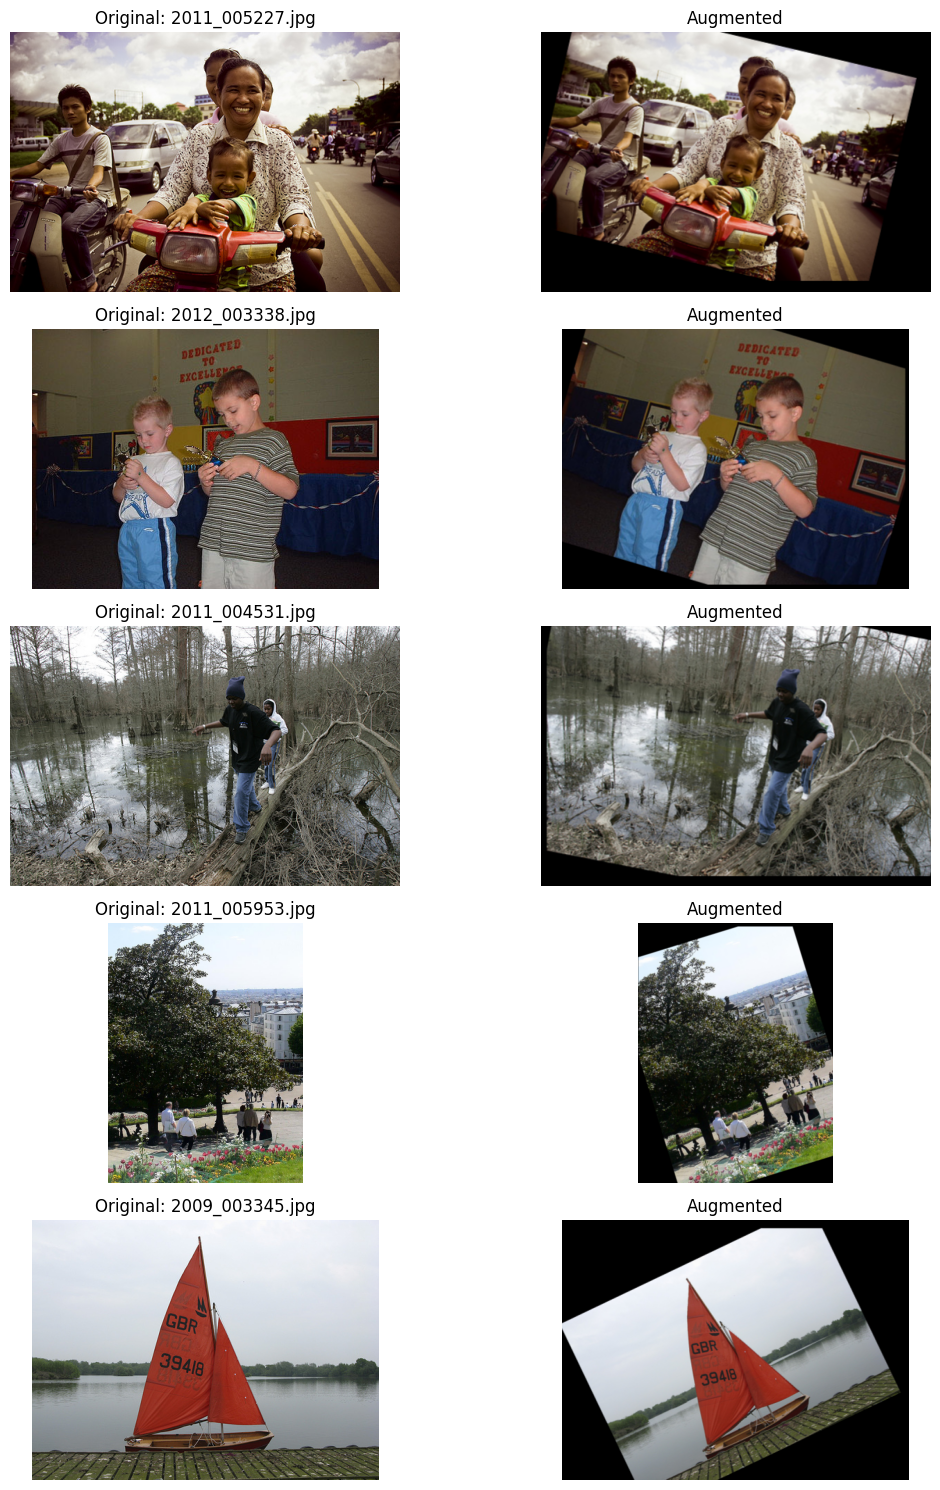

Summary Statistics for first 10 images:
Image                     | Mean Before  | Mean After  
-------------------------------------------------------
2011_005227.jpg           | 115.93       | 86.35       
2012_003338.jpg           | 69.34        | 63.54       
2011_004531.jpg           | 105.19       | 93.19       
2011_005953.jpg           | 106.04       | 84.87       
2009_003345.jpg           | 160.82       | 100.16      
2007_001420.jpg           | 104.07       | 93.07       
2011_005747.jpg           | 43.65        | 46.68       
2009_000328.jpg           | 128.76       | 118.10      
2008_001673.jpg           | 107.11       | 93.84       
2008_000321.jpg           | 112.97       | 82.19       


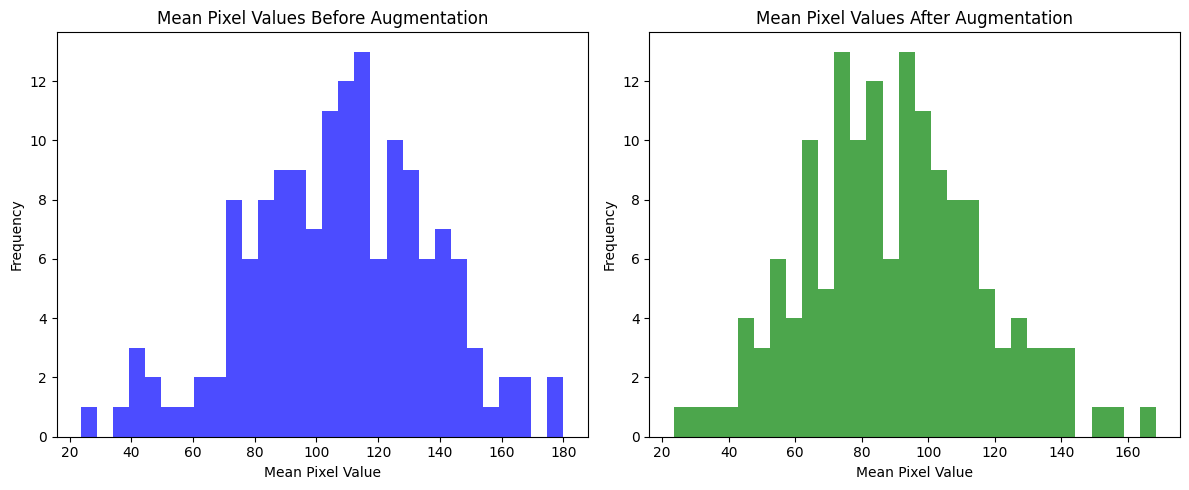

In [ ]:
all_images = os.listdir(data_dir)
sample_images = random.sample(all_images, 150)  

# Lists to store mean statistics
mean_before = []
mean_after = []

display_examples = 5
example_pairs = []

for img_name in sample_images:
    img_path = os.path.join(data_dir, img_name)
    img = cv2.imread(img_path)  
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    mean_before.append(np.mean(img_rgb))  
    
    #Data augmentation: random affine transformations
    h, w, _ = img_rgb.shape
    center = (w//2, h//2)
    
    # Random rotation between -30 to +30 degrees
    angle = random.uniform(-30, 30)
    # Random scaling between 0.8 to 1.2
    scale = random.uniform(0.8, 1.2)
    M_rot = cv2.getRotationMatrix2D(center, angle, scale)
    img_aug = cv2.warpAffine(img_rgb, M_rot, (w, h))
    
    # Random translation (-20 to +20 pixels)
    tx = random.uniform(-20, 20)
    ty = random.uniform(-20, 20)
    M_trans = np.float32([[1, 0, tx], [0, 1, ty]])
    img_aug = cv2.warpAffine(img_aug, M_trans, (w, h))
    
    #After augmentation
    mean_after.append(np.mean(img_aug))
    
    # Store a few example pairs for display
    if len(example_pairs) < display_examples:
        example_pairs.append((img_rgb, img_aug, img_name))


# Display example original vs augmented images
plt.figure(figsize=(12, display_examples*3))

for i, (orig, aug, name) in enumerate(example_pairs):
    plt.subplot(display_examples, 2, i*2 + 1)
    plt.imshow(orig)
    plt.title(f"Original: {name}")
    plt.axis('off')
    
    plt.subplot(display_examples, 2, i*2 + 2)
    plt.imshow(aug)
    plt.title("Augmented")
    plt.axis('off')

plt.tight_layout()
plt.show()
print("Summary Statistics for first 10 images:")
print(f"{'Image':25s} | {'Mean Before':12s} | {'Mean After':12s}")
print("-"*55)
for i in range(10):
    print(f"{sample_images[i]:25s} | {mean_before[i]:<12.2f} | {mean_after[i]:<12.2f}")

plt.figure(figsize=(12,5))

# Histogram before augmentation
plt.subplot(1,2,1)
plt.hist(mean_before, bins=30, color='blue', alpha=0.7)
plt.title("Mean Pixel Values Before Augmentation")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")

# Histogram after augmentation
plt.subplot(1,2,2)
plt.hist(mean_after, bins=30, color='green', alpha=0.7)
plt.title("Mean Pixel Values After Augmentation")
plt.xlabel("Mean Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


CANNY EDGE DETETCTOR

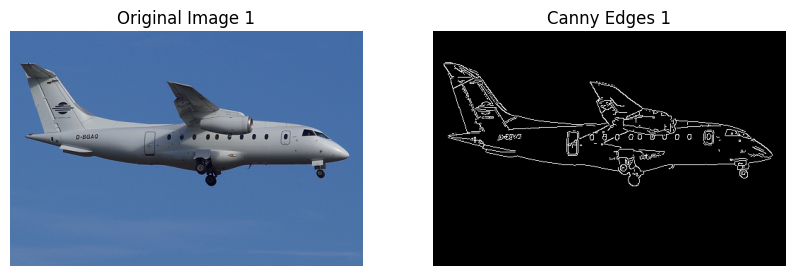

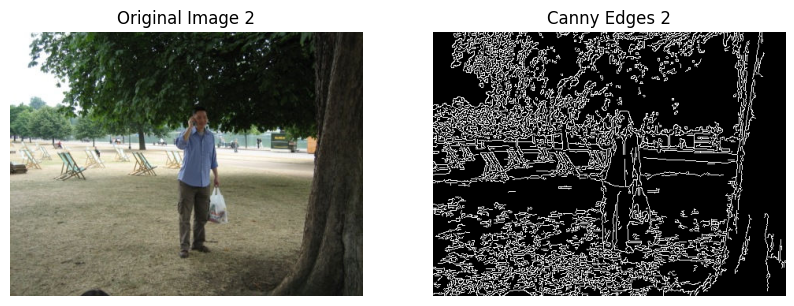

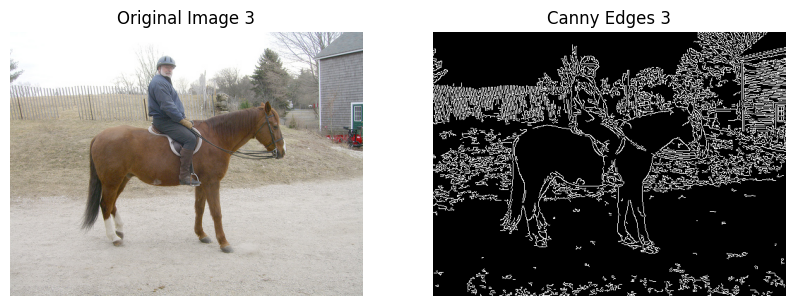

In [ ]:

all_images = os.listdir(data_dir)
sample_images = random.sample(all_images, 3)

lower_threshold = 50
upper_threshold = 150

for idx, img_name in enumerate(sample_images, 1):
    img_path = os.path.join(data_dir, img_name)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale for edge detection
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    # Canny edge detector
    edges = cv2.Canny(img_gray, lower_threshold, upper_threshold)
    
    # Show original and edge image
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image {idx}")
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny Edges {idx}")
    plt.axis('off')
    
    plt.show()


GAUSSIAN BLUR FLTER

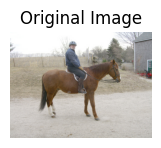

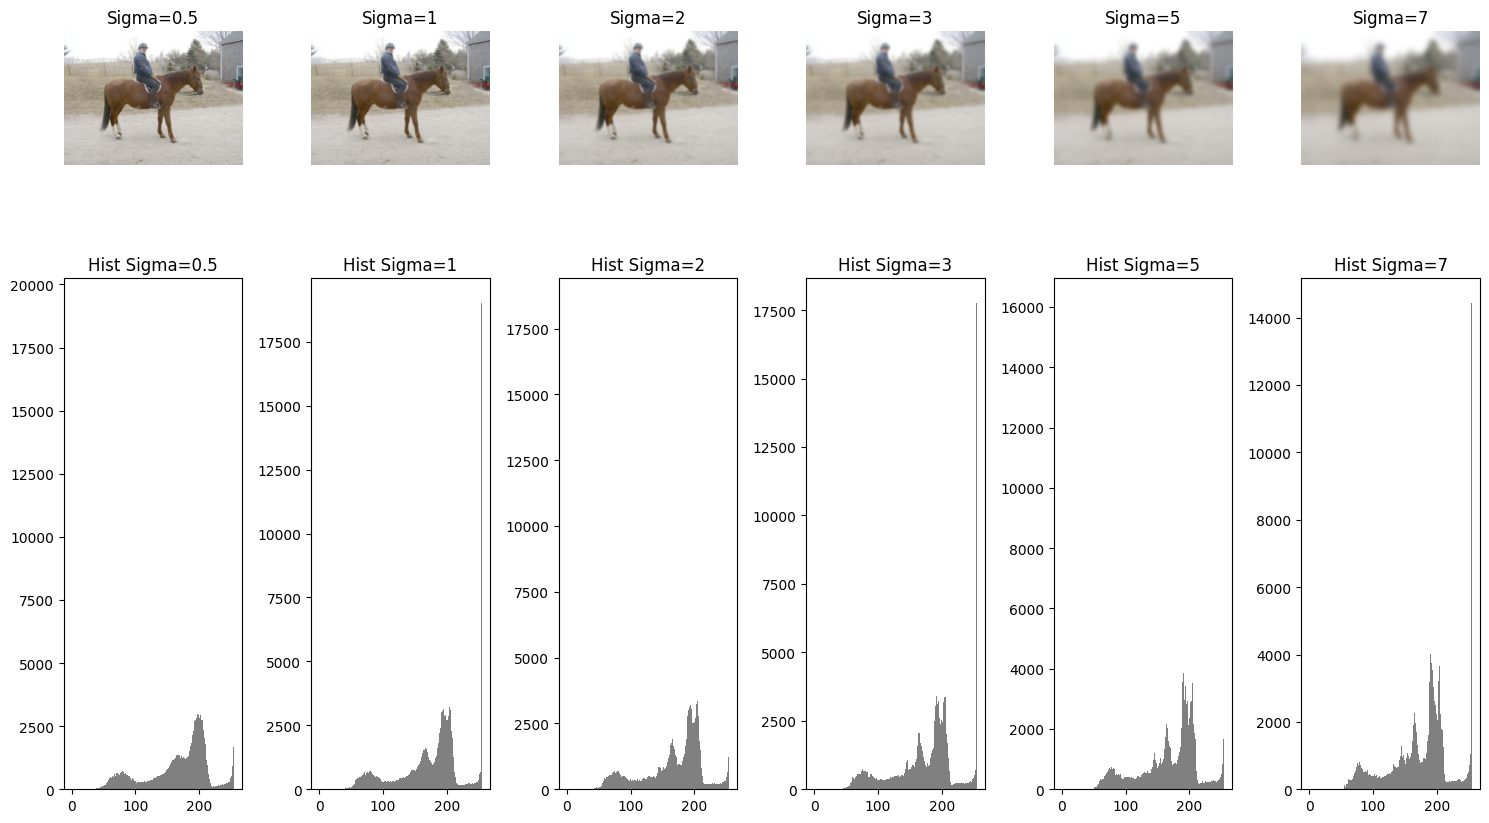

Sigma	Mean Edge Strength
0.5	43.57
1	27.88
2	17.68
3	14.09
5	10.95
7	9.43


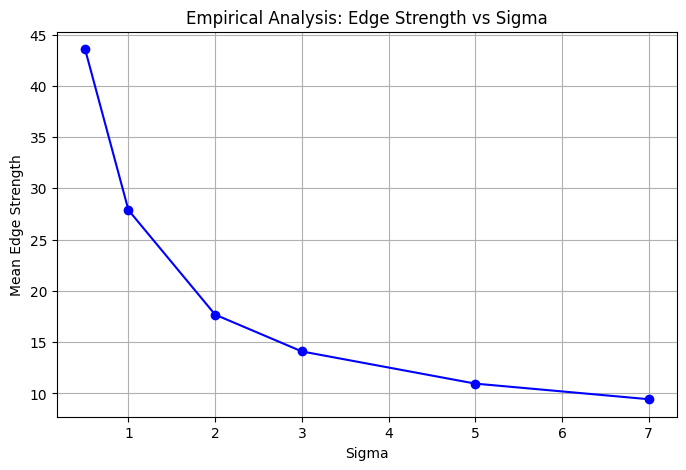

In [ ]:
sigma_values = [0.5, 1, 2, 3, 5, 7]
plt.figure(figsize=(15,5))
plt.subplot(1, len(sigma_values)+1, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
# Apply Gaussian blur 
plt.figure(figsize=(15,10))
for i, sigma in enumerate(sigma_values):
    ksize = int(6*sigma + 1)
    if ksize % 2 == 0:
        ksize += 1  
    
    blurred = cv2.GaussianBlur(img_rgb, (ksize, ksize), sigmaX=sigma)
    
    # Show blurred color image
    plt.subplot(2, len(sigma_values), i+1)
    plt.imshow(blurred)
    plt.title(f"Sigma={sigma}")
    plt.axis('off')
    
    # Show histogram of grayscale intensities (for comparison)
    blurred_gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
    plt.subplot(2, len(sigma_values), i+1+len(sigma_values))
    plt.hist(blurred_gray.ravel(), bins=256, range=(0,255), color='gray')
    plt.title(f"Hist Sigma={sigma}")

plt.tight_layout()
plt.show()

def edge_strength(image_gray):
    grad_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return np.mean(magnitude)

edge_values = []

for sigma in sigma_values:
    ksize = int(6*sigma + 1)
    if ksize % 2 == 0:
        ksize += 1
    blurred = cv2.GaussianBlur(img_gray, (ksize, ksize), sigmaX=sigma)
    edge_values.append(edge_strength(blurred))

# Edge strength values
print("Sigma\tMean Edge Strength")
for sigma, val in zip(sigma_values, edge_values):
    print(f"{sigma}\t{val:.2f}")

# Plot edge strength vs sigma
plt.figure(figsize=(8,5))
plt.plot(sigma_values, edge_values, marker='o', color='blue')
plt.title("Empirical Analysis: Edge Strength vs Sigma")
plt.xlabel("Sigma")
plt.ylabel("Mean Edge Strength")
plt.grid(True)
plt.show()